<a href="https://colab.research.google.com/github/ad597/ICM_Comp/blob/main/Comap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.optimize import minimize
import numpy as np

LV_Economy = np.array([1.2, 0.8, 1.0])  # Latent variable for economy
LV_Social = np.array([0.5, 1.1, 0.9])   # Latent variable for social
LV_Ecology = np.array([0.8, 1.3, 1.0])  # Latent variable for ecology

def objective(params):
    # Extract parameters
    alpha, beta, gamma, *weights = params

    w_Economy = np.array(weights[:3])  # Weights for Economy
    w_Social = np.array(weights[3:6])  # Weights for Social
    w_Ecology = np.array(weights[6:])  # Weights for Ecology


    Z_pred = (alpha * np.sum(w_Economy * LV_Economy) -
              beta * np.sum(w_Social * LV_Social) -
              gamma * np.sum(w_Ecology * LV_Ecology))

    Z_actual = 5  # Example value, replace with actual data

    return (Z_pred - Z_actual) ** 2

initial_guess = [1.0, 1.0, 1.0, 0.3, 0.3, 0.4, 0.5, 0.5, 0.0, 0.4, 0.4, 0.2]

result = minimize(objective, initial_guess, method='BFGS')

print("Optimized Parameters:", result.x)

Optimized Parameters: [ 1.84111065  0.98923545  0.93379673  0.99155912  0.76103945  0.9762993
  0.36890278  0.21158612 -0.23597497  0.12608786 -0.04510727 -0.14239014]


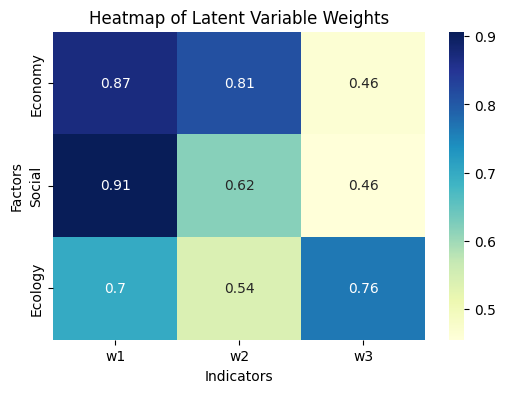

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
weights_matrix = np.random.rand(3, 3)  # Example 3x3 matrix of weights (Economy, Social, Ecology)
sns.heatmap(weights_matrix, annot=True, cmap="YlGnBu", xticklabels=['w1', 'w2', 'w3'], yticklabels=['Economy', 'Social', 'Ecology'])
plt.title('Heatmap of Latent Variable Weights')
plt.xlabel('Indicators')
plt.ylabel('Factors')
plt.show()

In [ ]:
import numpy as np
def loss_function(Z_predicted, Z_actual):
    return np.sum((Z_predicted - Z_actual) ** 2)


In [ ]:
import numpy as np


def loss_function(Z_predicted, Z_actual):
    return np.sum((Z_predicted - Z_actual) ** 2)
import numpy as np
from scipy.optimize import minimize

def loss_function(params, T, Z_actual):
    w = params[:9]  # First 9 elements are the weights
    alpha = params[9]  # 10th element is alpha
    beta = params[10]  # 11th element is beta
    gamma = params[11]  # 12th element is gamma

    Z_pred = model(T, w, alpha, beta, gamma)
    return np.sum((Z_pred - Z_actual) ** 2)  # MSE

def model(T, w, alpha, beta, gamma):
    Economy, Social, Ecology = T  # Assume T contains values for Economy, Social, and Ecology
    Z_pred = (alpha * np.sum(w[:3] * Economy)  # Weights for economy indicators
              -beta * np.sum(w[3:6] * Social)  # Weights for social indicators
              -gamma * np.sum(w[6:9] * Ecology))  # Weights for ecology indicators
    return Z_pred


def constraint_sum_weights(params):
    return np.sum(params[:9]) - 1  # Sum of first 9 weights should equal 1


T_example = [np.array([5, 10, 15]), np.array([3, 7, 9]), np.array([1, 4, 6])]  # Example data for Economy, Social, Ecology
Z_actual_example = np.array([100, 80, 90])  # Actual values (e.g., Z(T))

params_init = np.random.rand(12)  # 9 weights + alpha, beta, gamma


bounds = [(0, 10)] * 9 + [(None, None)] * 3  # Weights are between 0 and 10, alpha, beta, gamma have no bounds

constraints = [{'type': 'eq', 'fun': constraint_sum_weights}]  # The sum of the weights
if result.success:
    optimized_params = result.x
    optimized_w = optimized_params[:9]  # First 9 are weights
    optimized_alpha = optimized_params[9]  # 10th is alpha
    optimized_beta = optimized_params[10]  # 11th is beta
    optimized_gamma = optimized_params[11]  # 12th is gamma

    print("Optimized Parameters:")
    print("Weights:", optimized_w)
    print("Alpha:", optimized_alpha)
    print("Beta:", optimized_beta)
    print("Gamma:", optimized_gamma)
else:
    print("Optimization failed:", result.message)






Optimized Parameters:
Weights: [ 1.84111065  0.98923545  0.93379673  0.99155912  0.76103945  0.9762993
  0.36890278  0.21158612 -0.23597497]
Alpha: 0.12608785579285875
Beta: -0.045107267622865786
Gamma: -0.142390142185594


Mean Squared Error: 0.009999999999999988


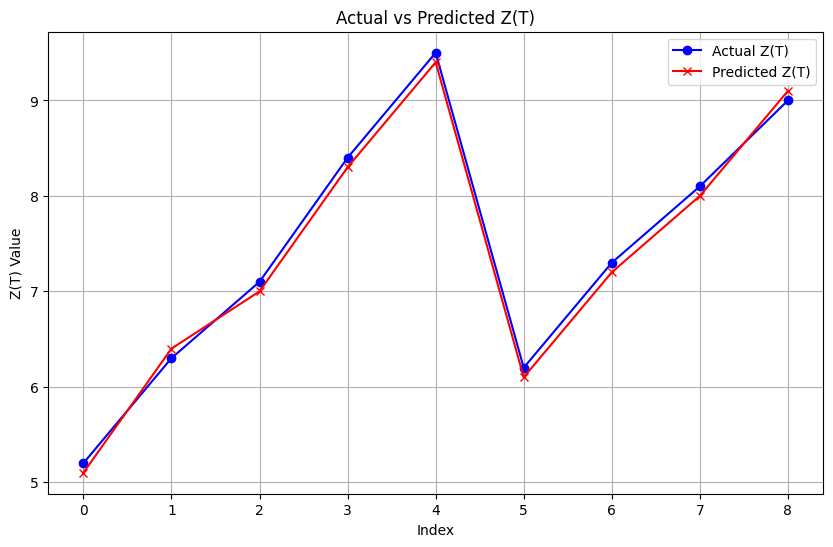

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Example of actual observed values (replace with your real data)
Z_actual = np.array([5.2, 6.3, 7.1, 8.4, 9.5, 6.2, 7.3, 8.1, 9.0])  # Actual observed Z(T) values

#Example of predicted Z(T) values using your model (replace with your predicted values from the model)
Z_predicted = np.array([5.1, 6.4, 7.0, 8.3, 9.4, 6.1, 7.2, 8.0, 9.1])  # Predicted Z(T) values from your model

#Calculate Mean Squared Error (MSE)
mse = np.mean((Z_predicted - Z_actual) ** 2)
print("Mean Squared Error:", mse)

#Plot Actual vs Predicted Z(T)
plt.figure(figsize=(10, 6))
plt.plot(Z_actual, label="Actual Z(T)", marker='o', color='blue')
plt.plot(Z_predicted, label="Predicted Z(T)", marker='x', color='red')
plt.legend()
plt.xlabel("Index")
plt.ylabel("Z(T) Value")
plt.title("Actual vs Predicted Z(T)")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

#Example actual Z(T) values (replace with your real data)
Z_actual = np.array([5.2, 6.3, 7.1, 8.4, 9.5, 6.2, 7.3, 8.1, 9.0])

#Example initial weights and scaling factors (random values)
weights = np.random.rand(9)  # weights for LVEconomy, LVSocial, LVEcology
alpha, beta, gamma = 0.1, 0.1, 0.1  # initial scaling factors

#Model to calculate Z_predicted(T) (based on the given weights and scaling factors)
def model(weights, alpha, beta, gamma, LVEconomy, LVSocial, LVEcology):
    return alpha * np.sum(weights * LVEconomy) - beta * np.sum(weights * LVSocial) - gamma * np.sum(weights * LVEcology)

#Example LVEconomy, LVSocial, LVEcology values (replace with your real data)
LVEconomy = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 0.6, 0.7, 0.8, 0.9])
LVSocial = np.array([0.6, 0.7, 0.8, 0.9, 1.0, 0.7, 0.8, 0.9, 1.0])
LVEcology = np.array([0.4, 0.5, 0.6, 0.7, 0.8, 0.5, 0.6, 0.7, 0.8])

#Mean Squared Error (MSE) Loss Function
def mse_loss(Z_predicted, Z_actual):
    return np.mean((Z_predicted - Z_actual) ** 2)

def gradient_descent(weights, alpha, beta, gamma, LVEconomy, LVSocial, LVEcology, Z_actual, learning_rate=0.01, epochs=100):
    # Gradients for weights and scaling factors
    for epoch in range(epochs):
        # Calculate predicted Z(T) using the model
        Z_predicted = model(weights, alpha, beta, gamma, LVEconomy, LVSocial, LVEcology)

        # Calculate the loss
        loss = mse_loss(Z_predicted, Z_actual)

#Calculate gradients with respect to weights, alpha, beta, and gamma
        grad_w = -2 * np.dot(Z_actual - Z_predicted, LVEconomy)  # gradient w.r.t. weights
        grad_alpha = -2 * np.sum(Z_actual - Z_predicted) * np.sum(LVEconomy)  # gradient w.r.t. alpha
        grad_beta = 2 * np.sum(Z_actual - Z_predicted) * np.sum(LVSocial)  # gradient w.r.t. beta
        grad_gamma = 2 * np.sum(Z_actual - Z_predicted) * np.sum(LVEcology)  # gradient w.r.t. gamma

##Update weights and scaling factors using gradient descent
        weights -= learning_rate * grad_w
        alpha -= learning_rate * grad_alpha
        beta -= learning_rate * grad_beta
        gamma -= learning_rate * grad_gamma

#Optionally, print the loss at every 10th epoch
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return weights, alpha, beta, gamma

#Apply Gradient Descent
optimized_weights, optimized_alpha, optimized_beta, optimized_gamma = gradient_descent(
    weights, alpha, beta, gamma, LVEconomy, LVSocial, LVEcology, Z_actual, learning_rate=0.0001, epochs=100)

#Final optimized parameters
print("Optimized Parameters:")
print("Weights:", optimized_weights)
print("Alpha:", optimized_alpha)
print("Beta:", optimized_beta)
print("Gamma:", optimized_gamma)


Epoch 0, Loss: 62.686042367264776
Epoch 10, Loss: 4.722256103590654
Epoch 20, Loss: 1.8718037356788773
Epoch 30, Loss: 1.7814709788143201
Epoch 40, Loss: 1.7804252134984948
Epoch 50, Loss: 1.7807236047765562
Epoch 60, Loss: 1.780784104342982
Epoch 70, Loss: 1.780787753138875
Epoch 80, Loss: 1.7807811309457575
Epoch 90, Loss: 1.7807728487040724
Optimized Parameters:
Weights: [0.92958727 0.70453932 0.49731894 0.50116427 1.06247472 0.64044729
 0.38909696 0.50500014 0.54432572]
Alpha: 0.7269032763859908
Beta: -0.6137052685009743
Gamma: -0.44010128427100764


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Load the data
Economy_Block = pd.read_csv('/content/drive/MyDrive/MCM ICM/1Economy Block - 工作表1-2.csv')
Social_Block = pd.read_csv('/content/drive/MyDrive/MCM ICM/1Social Comfort Block - 工作表1-5.csv')
Tourism_Block = pd.read_csv('/content/drive/MyDrive/MCM ICM/1Tourism Block - 工作表1-2.csv')
Ecology_Block = pd.read_csv('/content/drive/MyDrive/MCM ICM/Ecology Block - 工作表1-2.csv')

# Data preprocessing: Remove commas and convert to float
Tourism_Block['Air visitors'] = Tourism_Block['Air visitors'].str.replace(',', '').astype(float)
Economy_Block['Total Emoplyment (Tourism related)'] = Economy_Block['Total Emoplyment (Tourism related)'].str.replace(',', '').astype(float)

# Handle missing data
for df in [Tourism_Block, Social_Block, Ecology_Block, Economy_Block]:
    df.fillna(0, inplace=True)

# Normalize indicators (ensures balanced scales)
scaler = StandardScaler()
#Tourism_Block[['Cruise Passengers ', 'Air visitors','highway/ferry']] = scaler.fit_transform(Tourism_Block[['Cruise Passengers ', 'Air visitors','highway/ferry']])
Social_Block[[ 'Housing cons. Permits (Juneau)','Monthly Rental Costs','Net Imigration','New Births']] = scaler.fit_transform(Social_Block[['Housing cons. Permits (Juneau)','Monthly Rental Costs','Net Imigration','New Births']])
Ecology_Block[['Carbon Emission (Alaska)', 'Water discharge data (Riv)', 'Temperature (F, in Juneau)','glaciers']] = scaler.fit_transform(Ecology_Block[['Carbon Emission (Alaska)', 'Water discharge data (Riv)', 'Temperature (F, in Juneau)','glaciers']])
#Economy_Block[['Annual Income (Avg) (Alaska)', 'Tourist Total Spendings (B) AK','Total Emoplyment (Tourism related)']] = scaler.fit_transform(Economy_Block[['Annual Income (Avg) (Alaska)', 'Tourist Total Spendings (B) AK','Total Emoplyment (Tourism related)']])




# Calculate latent variable scores
Tourism_Block['LV_Tourism'] = Tourism_Block[['Cruise Passengers ', 'Air visitors','highway/ferry']].dot([1,1, 1])  # Equal weights
Social_Block['LV_Social'] = Social_Block[['Housing cons. Permits (Juneau)','Monthly Rental Costs','Net Imigration']].dot([1, 1, 1])
Ecology_Block['LV_Ecology_Stress'] = Ecology_Block[['Carbon Emission (Alaska)', 'Water discharge data (Riv)', 'Temperature (F, in Juneau)','glaciers']].dot([1, 1, 1,1])
Economy_Block['LV_Economy'] = Economy_Block[['Annual Income (Avg) (Alaska)', 'Tourist Total Spendings (B) AK','Total Emoplyment (Tourism related)']].dot([1, 1,1])

# Combine latent variables into a DataFrame
latent_variables = pd.DataFrame({
    'LV_Tourism': Tourism_Block['LV_Tourism'],
    'LV_Social': Social_Block['LV_Social'],
    'LV_Ecology_Stress': Ecology_Block['LV_Ecology_Stress'],
    'LV_Economy': Economy_Block['LV_Economy']
})


# --- Step 1: Internal Weights (e_ij) ---
# Structural model: Define relationships between latent variables (Tourism is the dependent variable)
structural_model = {
    'LV_Tourism': ['LV_Social', 'LV_Ecology_Stress', 'LV_Economy'],
    'LV_Social': ['LV_Tourism'],
    'LV_Ecology_Stress': ['LV_Tourism'],
    'LV_Economy': ['LV_Tourism']
}

# Compute correlations between latent variables
correlations = latent_variables.corr()
#print("\nPairwise Correlations:\n", correlations)

# Calculate internal weights based on correlations
internal_weights = {}
for lv_target, lv_sources in structural_model.items():
    weights = {}
    for lv_source in lv_sources:
        weights[lv_source] = correlations.loc[lv_target, lv_source]
    internal_weights[lv_target] = weights

print("\nInternal Weights (e_ij):\n", internal_weights)

# Update latent variable scores based on internal weights
updated_latent_scores = {}
for lv_target, lv_sources in structural_model.items():
    updated_score = 0
    for lv_source in lv_sources:
        updated_score += internal_weights[lv_target][lv_source] * latent_variables[lv_source]
    updated_latent_scores[lv_target] = updated_score

updated_latent_scores = pd.DataFrame(updated_latent_scores)
#print("\nUpdated Latent Variable Scores (Step 1):\n", updated_latent_scores)










# --- Step 2: Reflective Weight Refinement (Tourism Block) ---
X_tourism = Tourism_Block[['Cruise Passengers ', 'Air visitors','highway/ferry']].values  # Indicators
Y_tourism = updated_latent_scores['LV_Tourism'].values.reshape(-1, 1)

 # Updated latent variable scores

# Initialize weights for Tourism Block (equal weights)
W_tourism = np.array([1.0,1.0,1.0])  # Start with equal weights
tolerance = 1e-8  # Higher precision for convergence
max_iter = 100  # Maximum number of iterations
converged = False

print("Starting iterative weight refinement for Tourism Block...\n")
for iteration in range(max_iter):
    # Calculate the latent variable score using the current weights #ignore
   # Y_tourism = X_tourism @ W_tourism.reshape(-1, 1) # this is wrong
  #  print(f"Iteration {iteration + 1}:")
    #print(f"Current Latent Variable Scores (Y_tourism):\n{Y_tourism.flatten()}\n")

    # Recalculate weights based on the current latent variable scores
    W_new = inv(Y_tourism.T @ Y_tourism) @ (Y_tourism.T @ X_tourism)
   # print(f"New Weights Before Normalization (W_new):\n{W_new.flatten()}\n")

    # Normalize weights
    W_new /= np.sum(W_new)
  #  print(f"New Weights After Normalization (W_new):\n{W_new.flatten()}\n")

    # Check for convergence
    if np.allclose(W_new, W_tourism, atol=tolerance):
        converged = True
  #      print("Convergence achieved!\n")
        break

    # Update weights
    W_tourism = W_new.flatten()

if converged:
    print(f"Converged after {iteration + 1} iterations.\n")
else:
    print(f"Did not converge after {max_iter} iterations.\n")

print("Final Reflective Weights (Tourism Block):\n", np.round(W_tourism, decimals=8))


Tourism_Block['LV_Economy_Updated'] = X_tourism @ W_tourism.reshape(-1, 1)
print("\nUpdated Latent Variable Scores (Economy Block):\n", Tourism_Block['LV_Economy_Updated'].values.flatten())


# Recalculate Latent Variable Scores for Tourism Block











#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################

tolerance = 1e-8  # Convergence threshold
max_iter = 100  # Maximum number of iterations
converged = False

#print("Starting iterative weight refinement for Economy Block...\n")
X_economy = Economy_Block[['Annual Income (Avg) (Alaska)', 'Tourist Total Spendings (B) AK','Total Emoplyment (Tourism related)']].values
Y_economy = updated_latent_scores['LV_Economy'].values.reshape(-1, 1)

W_economy = np.array([1.0,1.0,1.0])



for iteration in range(max_iter):
    # Calculate the latent variable score using the current weights #
    #Y_economy = X_economy @ W_economy.reshape(-1, 1)
   # print(f"Iteration {iteration + 1}:")
    #print(f"Current Latent Variable Scores (Y_economy):\n{Y_economy.flatten()}\n")

    # Recalculate weights based on the current latent variable scores
    W_new = inv(X_economy.T @ X_economy) @ (X_economy.T @ Y_economy)
   # print(f"New Weights Before Normalization (W_new):\n{W_new.flatten()}\n")

    # Normalize weights to sum to 1 for comparability
    W_new /= np.sum(W_new)
   # print(f"New Weights After Normalization (W_new):\n{W_new.flatten()}\n")

    # Check for convergence
    if np.allclose(W_new, W_economy, atol=tolerance):
        converged = True
   #     print("Convergence achieved!\n")
        break

    # Update weights
    W_economy = W_new.flatten()

# Print final weights and check convergence
if converged:
    print(f"Converged after {iteration + 1} iterations.\n")
else:
    print(f"Did not converge after {max_iter} iterations.\n")

print("Final Formative Weights (Economy Block):\n", np.round(W_economy, decimals=8))

# Recalculate Latent Variable Scores for Economy Block
Economy_Block['LV_Economy_Updated'] = X_economy @ W_economy.reshape(-1, 1)
print("\nUpdated Latent Variable Scores (Economy Block):\n", Economy_Block['LV_Economy_Updated'].values.flatten())


###-----
#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################



# Reflective Weight Refinement (Ecology Block)
X_ecology = Ecology_Block[['Carbon Emission (Alaska)', 'Water discharge data (Riv)', 'Temperature (F, in Juneau)','glaciers']].values  # Indicators
Y_ecology = updated_latent_scores['LV_Ecology_Stress'].values.reshape(-1, 1)  # Use updated latent variable scores from Step 1

# Initialize weights for Ecology Block (equal weights)
W_ecology = np.array([1.0, 1.0, 1.0,1.0])  # Start with equal weights
tolerance = 1e-8  # Higher precision for convergence
max_iter = 100  # Maximum number of iterations
converged = False

print("Starting iterative weight refinement for Ecology Block...\n")
for iteration in range(max_iter):
    # Calculate the latent variable score using the current weights
 #   Y_ecology = X_ecology @ W_ecology.reshape(-1, 1)
  #  print(f"Iteration {iteration + 1}:")
  #  print(f"Current Latent Variable Scores (Y_ecology):\n{Y_ecology.flatten()}\n")

    # Recalculate weights based on the current latent variable scores
    W_new = inv(Y_ecology.T @ Y_ecology) @ (Y_ecology.T @ X_ecology)
  #  print(f"New Weights Before Normalization (W_new):\n{W_new.flatten()}\n")

    # Normalize weights to sum to 1
    W_new /= np.sum(W_new)
  #  print(f"New Weights After Normalization (W_new):\n{W_new.flatten()}\n")

    # Check for convergence
    if np.allclose(W_new, W_ecology, atol=tolerance):
        converged = True
     #   print("Convergence achieved!\n")
        break

    # Update weights
    W_ecology = W_new.flatten()

# Print final weights and check convergence
if converged:
    print(f"Converged after {iteration + 1} iterations.\n")
else:
    print(f"Did not converge after {max_iter} iterations.\n")

print("Final Reflective Weights (Ecology Block Stress):\n", np.round(W_ecology, decimals=8))

# Recalculate Latent Variable Scores for Ecology Block
Ecology_Block['LV_Ecology_Updated'] = X_ecology @ W_ecology.reshape(-1, 1)
print("\nUpdated Latent Variable Scores (Ecology SressBlock, Step 2):\n", Ecology_Block['LV_Ecology_Updated'].values.flatten())




#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################





# Reflective Weight Refinement (Social Comfort Block)
X_social = Social_Block[[ 'Housing cons. Permits (Juneau)','Monthly Rental Costs','Net Imigration','New Births']].values  # Indicators
Y_social = updated_latent_scores['LV_Social'].values.reshape(-1, 1)  # Use updated latent variable scores from Step 1

# Initialize weights for Social Comfort Block (equal weights)
W_social = np.array([1.0, 1.0,1.0,1.0])  # Start with equal weights
tolerance = 1e-8  # Higher precision for convergence
max_iter = 100  # Maximum number of iterations
converged = False

print("Starting iterative weight refinement for Social Comfort Block...\n")
for iteration in range(max_iter):
    # Calculate the latent variable score using the current weights
  #  Y_social = X_social @ W_social.reshape(-1, 1)
   # print(f"Iteration {iteration + 1}:")
    #print(f"Current Latent Variable Scores (Y_social):\n{Y_social.flatten()}\n")

    # Recalculate weights based on the current latent variable scores
    W_new = inv(Y_social.T @ Y_social) @ (Y_social.T @ X_social)
    #print(f"New Weights Before Normalization (W_new):\n{W_new.flatten()}\n")

    # Normalize weights to sum to 1
    W_new /= np.sum(W_new)
    #print(f"New Weights After Normalization (W_new):\n{W_new.flatten()}\n")

    # Check for convergence
    if np.allclose(W_new, W_social, atol=tolerance):
        converged = True
   #     print("Convergence achieved!\n")
        break

    # Update weights
    W_social = W_new.flatten()

# Print final weights and check convergence
if converged:
    print(f"Converged after {iteration + 1} iterations.\n")
else:
    print(f"Did not converge after {max_iter} iterations.\n")

print("Final Reflective Weights (Social Comfort Block):\n", np.round(W_social, decimals=8))

# Recalculate Latent Variable Scores for Social Comfort Block
Social_Block['LV_Social_Updated'] = X_social @ W_social.reshape(-1, 1)
print("\nUpdated Latent Variable Scores (Social Comfort Block, Step 2):\n", Social_Block['LV_Social_Updated'].values.flatten())

## change 0.89811838 to negative for immigration

# Recalculate Latent Variable Scores for Social Comfort Block
Social_Block['LV_Social_Updated'] = Social_Block[['Housing cons. Permits (Juneau)',
                                                  'Monthly Rental Costs',
                                                  'Net Imigration',
                                                  'New Births']].dot(
                                                  [-0.0653, -0.6899, -0.8981, 0.8571])
print("\nUpdated Latent Variable Scores (Social Comfort Block, Adjusted):\n", Social_Block['LV_Social_Updated'])



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Internal Weights (e_ij):
 {'LV_Tourism': {'LV_Social': -0.08642456491895471, 'LV_Ecology_Stress': -0.7353699181167352, 'LV_Economy': 0.964163130698263}, 'LV_Social': {'LV_Tourism': -0.08642456491895471}, 'LV_Ecology_Stress': {'LV_Tourism': -0.7353699181167352}, 'LV_Economy': {'LV_Tourism': 0.964163130698263}}
Starting iterative weight refinement for Tourism Block...

Converged after 2 iterations.

Final Reflective Weights (Tourism Block):
 [0.56933255 0.38573211 0.04493535]

Updated Latent Variable Scores (Economy Block):
 [735024.38940732 757071.12186872 803474.72262864 786251.46375968
 834153.21321506 869906.96241781 903856.16983372 952921.38511796]
Did not converge after 100 iterations.

Final Formative Weights (Economy Block):
 [0.43598401 0.15792978 0.40608621]

Updated Latent Variable Scores (Economy Block):
 [65878.74616552 69241.72420312 69482.108326

Optimal Tourist Volume: 100050.00
Optimal Tourist Tax Rate: 9.99
Optimal Investment: 500000.00


优化成功！最优游客数量: 0.00
目标函数值: 0.00


In [ ]:
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import numpy as np

# Coefficients for the objective function (Maximize tourism and economic output)
w_Tc = 0.5114  # Economic contribution per cruise tourist
w_Ta = 0.3     # Economic contribution per air tourist
w_Th = 0.0449  # Economic contribution per highway/ferry tourist

c = [-w_Tc, -w_Ta, -w_Th]

# Constraints coefficients (A_ub * x <= b_ub)
T_c_max = 1200000  # Max cruise tourists
T_a_max = 800000   # Max air tourists
T_h_max = 100000   # Max highway/ferry tourists
s_Cr = -0.0864245649  # Effect of rental cost on social comfort
S_min = -200000       # Adjusted minimum acceptable social comfort score
d_Ec = 0.7306         # Carbon emissions per tourist
D_max = 10_000        # Relaxed max acceptable ecological stress level

A_ub = [
    [1, 0, 0],  # T_c <= T_c_max
    [0, 1, 0],  # T_a <= T_a_max
    [0, 0, 1],  # T_h <= T_h_max
    [-s_Cr, -s_Cr, -s_Cr],  # Social comfort >= S_min
    [d_Ec, d_Ec, d_Ec]  # Ecological stress <= D_max
]

b_ub = [
    T_c_max,
    T_a_max,
    T_h_max,
    -S_min,
    D_max
]

x_bounds = [(0, None), (0, None), (0, None)]

# Solve the optimization problem
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=x_bounds, method='highs')

# Extract the results
if result.success:
    T_c_opt, T_a_opt, T_h_opt = result.x
    max_output = -result.fun * 1000

    # Print the results
    print(f"Optimized Cruise Tourists (T_c): {T_c_opt * 300:.0f}")
    print(f"Optimized Air Tourists (T_a): {T_a_opt * 1000:.0f}")
    print(f"Optimized Highway/Ferry Tourists (T_h): {T_h_opt * 1000:.0f}")
    print(f"Maximum Economic Output: {max_output:,.2f}")



else:
    print("Optimization failed:", result.message)



Optimized Cruise Tourists (T_c): 4106214
Optimized Air Tourists (T_a): 0
Optimized Highway/Ferry Tourists (T_h): 0
Maximum Economic Output: 6,999,726.25


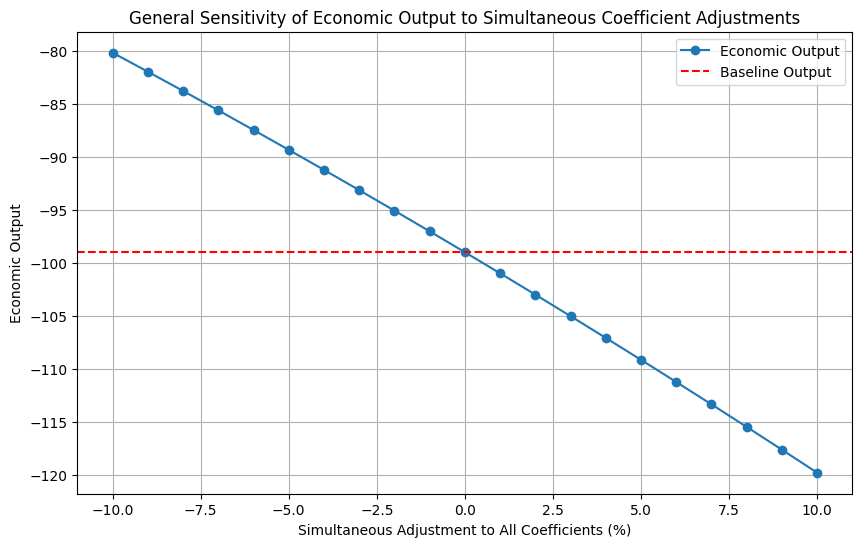

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Baseline coefficients (from provided weights)
coefficients = {
    "tourism_to_social_comfort": -0.0864245649,  # Tourism's effect on social comfort
    "tourism_to_ecological_stress": 0.7306,  # Tourism's effect on ecological stress
    "social_comfort_to_economic_output": 0.3,  # Social comfort's effect on economic output
    "ecological_stress_to_economic_output": -0.1,  # Ecological stress's effect on economic output
}

# Sensitivity range (±10% simultaneous adjustment for all coefficients)
sensitivity_range = np.linspace(-0.1, 0.1, 21)  # ±10% range with 21 points

# Function to calculate economic output based on adjusted coefficients
def calculate_economic_output(tourism, coefficients):
    social_comfort = tourism * coefficients["tourism_to_social_comfort"]
    ecological_stress = tourism * coefficients["tourism_to_ecological_stress"]
    economic_output = (
        social_comfort * coefficients["social_comfort_to_economic_output"]
        + ecological_stress * coefficients["ecological_stress_to_economic_output"]
    )
    return economic_output

# Baseline tourism value
tourism_baseline = 1000

# Store results for general sensitivity analysis
general_sensitivity_results = []

# Perform general sensitivity analysis (simultaneous adjustment)
for adjustment in sensitivity_range:
    adjusted_coefficients = {
        key: value * (1 + adjustment) for key, value in coefficients.items()
    }
    output = calculate_economic_output(tourism_baseline, adjusted_coefficients)
    general_sensitivity_results.append(output)

# Plot results for general sensitivity analysis
plt.figure(figsize=(10, 6))
plt.plot(sensitivity_range * 100, general_sensitivity_results, marker='o', label="Economic Output")
plt.axhline(calculate_economic_output(tourism_baseline, coefficients), color='r', linestyle='--', label="Baseline Output")
plt.title("General Sensitivity of Economic Output to Simultaneous Coefficient Adjustments")
plt.xlabel("Simultaneous Adjustment to All Coefficients (%)")
plt.ylabel("Economic Output")
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-29-10432b408869>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


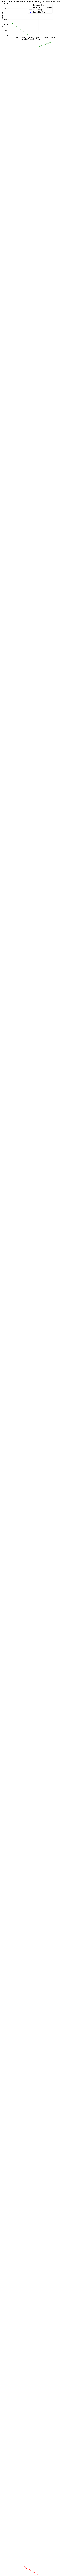

In [ ]:
# Highlight the feasible region and constraints with clear visualization
plt.plot(x, T_a_limit, label='Ecological Constraint', color='green', linestyle='--')
plt.plot(x, T_h_limit, label='Social Comfort Constraint', color='red', linestyle='--')

# Shade the feasible region
plt.fill_between(x, 0, np.minimum(T_a_limit, T_h_limit), color='gray', alpha=0.3, label='Feasible Region')

# Highlight the optimal solution
plt.scatter(T_c_opt, T_a_opt, color='blue', label='Optimal Solution', zorder=5)

# Add labels for constraints
plt.text(20_000, T_a_limit[20], "Ecological Constraint", color='green', fontsize=10, rotation=20)
plt.text(10_000, T_h_limit[10], "Social Comfort Constraint", color='red', fontsize=10, rotation=-30)

# Zoom in further on the optimal region
plt.xlim(0, 30_000)
plt.ylim(0, 30_000)

# Add plot details
plt.title('Constraints and Feasible Region Leading to Optimal Solution', fontsize=16)
plt.xlabel('Cruise Tourists (T_c)', fontsize=14)
plt.ylabel('Air Tourists (T_a)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()

# Display the updated plot
plt.show()

